# **df4 - Preprocessing**

# **For Multilingual Insurance Policy Dataset**

# **Using Real Time Dataset**

# **Daily Mail Summarization**

In [ ]:
#######################################################################

In [ ]:
import pandas as pd

In [ ]:
df4=pd.read_csv('/content/article_highlights.csv')

In [ ]:
df4.head()

url  \
0  https://www.dailymail.co.uk/tvshowbiz/article-...   
1  https://www.dailymail.co.uk/tvshowbiz/article-...   
2  https://www.dailymail.co.uk/tvshowbiz/article-...   
3  https://www.dailymail.co.uk/tvshowbiz/article-...   
4  https://www.dailymail.co.uk/tvshowbiz/article-...   

                                             article  \
0  Beyoncé showcases her incredible figure in plu...   
1  Radio 1 listeners in shock as sex noises are p...   
2  TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...   
3  Bradley Cooper recalls 'crazy' pitch meeting a...   
4  Margaret Qualley and Beanie Feldstein stun in ...   

                                          highlights  
0  Beyoncé has shown off her flawless beauty in a...  
1  BBC Radio 1 listeners were left choking on the...  
2  Dan Edgar and Ella Rae Wise put on a loved-up ...  
3  Bradley Cooper discussed the 'crazy' experienc...  
4  Margaret Qualley and Beanie Feldstein were dre...

In [ ]:
df4.shape

(8176, 3)

In [ ]:
df4[['article','highlights']]

article  \
0     Beyoncé showcases her incredible figure in plu...   
1     Radio 1 listeners in shock as sex noises are p...   
2     TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...   
3     Bradley Cooper recalls 'crazy' pitch meeting a...   
4     Margaret Qualley and Beanie Feldstein stun in ...   
...                                                 ...   
8171  Bernardo Silva's calamitous free kick against ...   
8172  Son Heung-min and Lee Kang-in bury the hatchet...   
8173  Bernardo Silva's calamitous free kick against ...   
8174  Son Heung-min and Lee Kang-in bury the hatchet...   
8175  Bernardo Silva's calamitous free kick against ...   

                                             highlights  
0     Beyoncé has shown off her flawless beauty in a...  
1     BBC Radio 1 listeners were left choking on the...  
2     Dan Edgar and Ella Rae Wise put on a loved-up ...  
3     Bradley Cooper discussed the 'crazy' experienc...  
4     Margaret Qualley and Beanie Feldstein were dre...  
...                                                 ...  
8171  Bernardo Silva's calamitous free-kick against ...  
8172  Spurs star Son Heung-min and PSG's Lee Kang-in...  
8173  Bernardo Silva's calamitous free-kick against ...  
8174  Spurs star Son Heung-min and PSG's Lee Kang-in...  
8175  Bernardo Silva's calamitous free-kick against ...  

[8176 rows x 2 columns]

# **1) Check Missing Values**

In [ ]:
df4.isnull().sum()

url            0
article       11
highlights     3
dtype: int64

# **I Delete Missing Values if Fill Missing Values Like Mode its may Confuse a Machine so i Remove it**

In [ ]:
df4.drop('url',axis=1,inplace=True)

In [ ]:
df_cleaned = df4.dropna()  # Remove rows with any missing values

In [ ]:
df_cleaned.isnull().sum()

article       0
highlights    0
dtype: int64

In [ ]:
df_cleaned.shape

(8165, 2)

In [ ]:
########################################################

In [ ]:
df_cleaned.head()

article  \
0  Beyoncé showcases her incredible figure in plu...   
1  Radio 1 listeners in shock as sex noises are p...   
2  TOWIE's Dan Edgar, 33, and Ella Rae Wise, 23, ...   
3  Bradley Cooper recalls 'crazy' pitch meeting a...   
4  Margaret Qualley and Beanie Feldstein stun in ...   

                                          highlights  
0  Beyoncé has shown off her flawless beauty in a...  
1  BBC Radio 1 listeners were left choking on the...  
2  Dan Edgar and Ella Rae Wise put on a loved-up ...  
3  Bradley Cooper discussed the 'crazy' experienc...  
4  Margaret Qualley and Beanie Feldstein were dre...

In [ ]:
df_cleaned.nunique()

article       70
highlights    54
dtype: int64

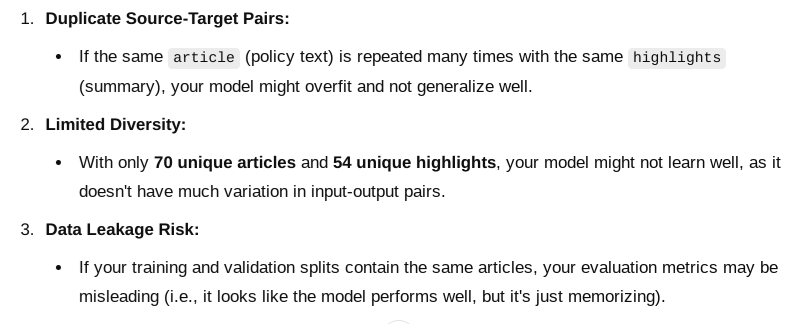

In [ ]:
print(df_cleaned.duplicated().sum())  # Count fully duplicated rows
print(df_cleaned.duplicated(subset=['article', 'highlights']).sum())  # Count duplicate article-summary pairs


8095
8095


# **8095 - Lot of Dublicate so My Machine Won't Read Properly and make more mistakes**

In [ ]:
##############################################################################################

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sunnysai12345/news-summary")

print("Path to dataset files:", path)

100%|██████████| 19.8M/19.8M [00:00<00:00, 62.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sunnysai12345/news-summary/versions/2


In [ ]:
df4_new = pd.read_csv(path + '/news_summary_more.csv', encoding='latin-1')
df4_new.head()

headlines  \
0  upGrad learner switches to career in ML & Al w...   
1  Delhi techie wins free food from Swiggy for on...   
2  New Zealand end Rohit Sharma-led India's 12-ma...   
3  Aegon life iTerm insurance plan helps customer...   
4  Have known Hirani for yrs, what if MeToo claim...   

                                                text  
0  Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1  Kunal Shah's credit card bill payment platform...  
2  New Zealand defeated India by 8 wickets in the...  
3  With Aegon Life iTerm Insurance plan, customer...  
4  Speaking about the sexual harassment allegatio...

# **Check Missing Values**

In [ ]:
df4_new.isnull().sum()  # Check missing values

headlines    0
text         0
dtype: int64

# **Check Duplicates**

In [ ]:
print(df4_new.duplicated().sum())  # Count fully duplicated rows
print(df4_new.duplicated(subset=['text', 'headlines']).sum())  # Count duplicate article-summary pairs

22
22


In [ ]:
df4_new.shape

(98401, 2)

# **Very Low Duplicated Compare to 98k, 22 Duplicates is very Low - so i delete it**

# **. Remove Duplicates and Missing Values**

In [ ]:
df4_new = df4_new.drop_duplicates(subset=['text', 'headlines']).dropna(subset=['text', 'headlines'])
print(f"Rows after cleaning: {len(df4_new)}")


Rows after cleaning: 98379


In [ ]:
##############################################################################

# **My Dataset has 98379 Unique its May Affect my Time so i Reduce Dataset**

# **Random Sampling - 98000 to 30000 reduced**

In [ ]:
# Reduce dataset to 30,000 rows
df4_new = df4_new.sample(n=30000, random_state=42)

df4_new.to_csv("df4_new_reduced_dataset.csv", index=False)
print(f"Reduced dataset size: {len(df4_new)}")


Reduced dataset size: 30000


In [ ]:
df4_random = pd.read_csv('/content/df4_new_reduced_dataset.csv')
df4_random.head()

headlines  \
0  Ex-dentist's new mobile app gets $40 mn after ...   
1  LG tests robots to guide passengers in airport...   
2  Opposition is trying to kill me: Delhi CM on c...   
3  Policeman touches UP Minister's feet for scrap...   
4  I'd love to make Mahabharat film but don't hav...   

                                                text  
0  Former South Korean dentist Seunggun Lee's mob...  
1  LG is testing two robot prototypes to provide ...  
2  Reacting to the chilli powder attack on him on...  
3  A policeman in Uttar Pradesh's Kanpur touched ...  
4  Actor Shah Rukh Khan has said that he would lo...

In [ ]:
df4_random.shape

(30000, 2)

In [ ]:
######################################################################################

# **1 ) Text Preprocesssing**

In [ ]:
df4_random.columns

Index(['headlines', 'text'], dtype='object')

# **1️⃣ Load & Inspect Data**

# **check for missing values & duplicates**

In [ ]:
# already Checked

# **2️⃣ Normalize & Clean Text**

In [ ]:
# To improve model input, apply basic text cleaning:

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9.,!?]", " ", text)  # Remove special characters (except punctuation)
    return text.strip()

df4_random['text'] = df4_random['text'].apply(clean_text)
df4_random['headlines'] = df4_random['headlines'].apply(clean_text)


In [ ]:
df4_random

headlines  \
0      ex dentist s new mobile app gets  40 mn after ...   
1      lg tests robots to guide passengers in airport...   
2      opposition is trying to kill me  delhi cm on c...   
3      policeman touches up minister s feet for scrap...   
4      i d love to make mahabharat film but don t hav...   
...                                                  ...   
29995  who is krishnamurthy subramanian, new chief ec...   
29996  air india flight lands at delhi without passen...   
29997  alcoholic man arrested for rape of 13 yr old d...   
29998  akshay, srk slam terror attack on amarnath yat...   
29999  india will be open defecation free by oct 2019...   

                                                    text  
0      former south korean dentist seunggun lee s mob...  
1      lg is testing two robot prototypes to provide ...  
2      reacting to the chilli powder attack on him on...  
3      a policeman in uttar pradesh s kanpur touched ...  
4      actor shah rukh khan has said that he would lo...  
...                                                  ...  
29995  india s new chief economic adviser krishnamurt...  
29996  an air india flight from dharamshala arrived a...  
29997  uttar pradesh police have arrested a man from ...  
29998  akshay kumar, shah rukh khan, anupam kher and ...  
29999  launching the       swachhta hi sewa        cl...  

[30000 rows x 2 columns]

# **Removes noise while keeping important text**

1) Lowerization

2) Remove Extra Spaces

3) Remove URLs

4) Remove Special Characters

In [ ]:
df4_random.to_csv('df4_preprocessed.csv')

In [ ]:
df4_pre = pd.read_csv('/content/df4_preprocessed.csv')

In [ ]:
############################################################

In [ ]:
df4_pre.head()

Unnamed: 0                                          headlines  \
0           0  ex dentist s new mobile app gets  40 mn after ...   
1           1  lg tests robots to guide passengers in airport...   
2           2  opposition is trying to kill me  delhi cm on c...   
3           3  policeman touches up minister s feet for scrap...   
4           4  i d love to make mahabharat film but don t hav...   

                                                text  
0  former south korean dentist seunggun lee s mob...  
1  lg is testing two robot prototypes to provide ...  
2  reacting to the chilli powder attack on him on...  
3  a policeman in uttar pradesh s kanpur touched ...  
4  actor shah rukh khan has said that he would lo...

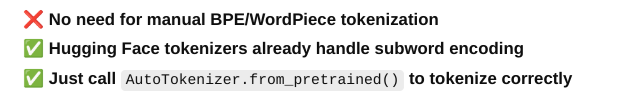

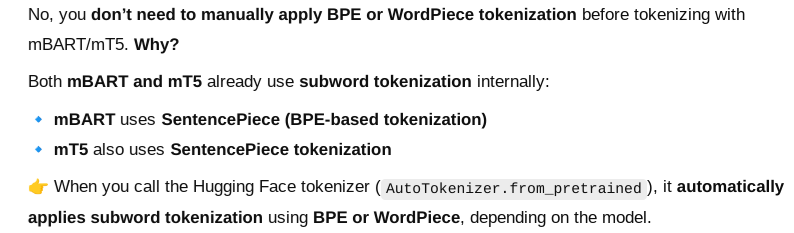

In [ ]:
df4_pre.head()

Unnamed: 0                                          headlines  \
0           0  ex dentist s new mobile app gets  40 mn after ...   
1           1  lg tests robots to guide passengers in airport...   
2           2  opposition is trying to kill me  delhi cm on c...   
3           3  policeman touches up minister s feet for scrap...   
4           4  i d love to make mahabharat film but don t hav...   

                                                text  
0  former south korean dentist seunggun lee s mob...  
1  lg is testing two robot prototypes to provide ...  
2  reacting to the chilli powder attack on him on...  
3  a policeman in uttar pradesh s kanpur touched ...  
4  actor shah rukh khan has said that he would lo...

In [ ]:
df4_pre.shape

(30000, 3)

In [ ]:
#####################################################################################

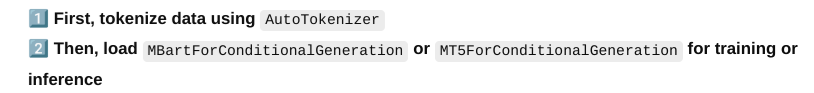

# **3️⃣ Tokenization (For mBART/mT5)**

**Convert text into tokenized format using Hugging Face tokenizer:**

In [ ]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-cc25")

# Define max sequence length
max_input_length = 512
max_target_length = 150

# Tokenize inputs & outputs
df4_pre['text_tokenized'] = df4_pre['text'].apply(lambda x: tokenizer.encode(x, truncation=True, padding="max_length", max_length=max_input_length))
df4_pre['headlines_tokenized'] = df4_pre['headlines'].apply(lambda x: tokenizer.encode(x, truncation=True, padding="max_length", max_length=max_target_length))


In [ ]:
df4_pre.head()

Unnamed: 0                                          headlines  \
0           0  ex dentist s new mobile app gets  40 mn after ...   
1           1  lg tests robots to guide passengers in airport...   
2           2  opposition is trying to kill me  delhi cm on c...   
3           3  policeman touches up minister s feet for scrap...   
4           4  i d love to make mahabharat film but don t hav...   

                                                text  \
0  former south korean dentist seunggun lee s mob...   
1  lg is testing two robot prototypes to provide ...   
2  reacting to the chilli powder attack on him on...   
3  a policeman in uttar pradesh s kanpur touched ...   
4  actor shah rukh khan has said that he would lo...   

                                      text_tokenized  \
0  [36770, 127067, 20867, 66, 151250, 40, 1619, 6...   
1  [96, 177, 83, 134234, 6626, 11329, 160469, 90,...   
2  [131300, 214, 47, 70, 149031, 14, 173169, 5287...   
3  [10, 35206, 669, 23, 486, 867, 6, 221313, 91, ...   
4  [39329, 90497, 79758, 127, 70144, 1556, 2804, ...   

                                 headlines_tokenized  
0  [1119, 151250, 91, 3525, 14288, 4027, 62163, 1...  
1  [96, 177, 109921, 11329, 7, 47, 17997, 44828, ...  
2  [177986, 83, 31577, 47, 67153, 163, 146, 979, ...  
3  [35206, 669, 116281, 7, 1257, 24284, 91, 74261...  
4  [17, 104, 5161, 47, 3249, 13490, 42927, 257, 1...

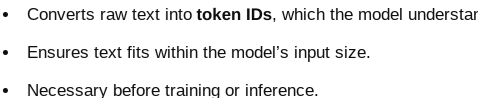

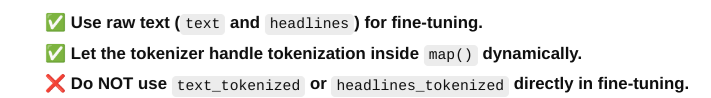

image.png

In [ ]:
##########################################################################################

# **Fine Tuning for mBART**

In [ ]:
!pip install transformers datasets sentencepiece accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Colab session crashed due to running out of RAM. This happens because mBART is a large model and requires a lot of memory for training**

# **so Reducing Batchsize 8 to 2**

In [ ]:
################################################################################################################

# **Colab session crashed due to running out of RAM** while fine-tuning mBART. This happens because mBART is a large model, and your dataset (30,000 rows) is consuming too much memory.

**1 ] Reduce Batch Size - 2 to 1**

per_device_train_batch_size=1,
per_device_eval_batch_size=1,


**2 ] Reduce Dataset Size - If 30,000 rows are too much, try reducing to 10,000 rows:**

dataset = dataset.train_test_split(test_size=0.1, train_size=10000)


**3 ] Use Mixed Precision (FP16) - Enable half-precision training to cut memory usage**

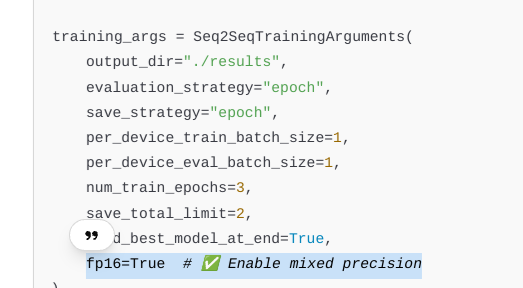


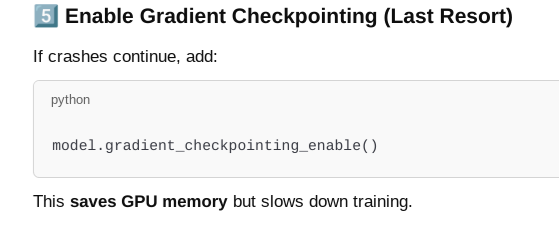

In [ ]:
from transformers import MBartForConditionalGeneration, AutoTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset
import pandas as pd

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-cc25")
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-cc25")
model.gradient_checkpointing_enable()  # ✅ Reduce memory usage

# Tokenize function
def tokenize_function(examples):
    model_inputs = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)
    labels = tokenizer(examples["headlines"], truncation=True, padding="max_length", max_length=32)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

df4_pre = pd.read_csv('/content/df4_preprocessed.csv')

# Convert Pandas DataFrame to Dataset
dataset = Dataset.from_pandas(df4_pre)
dataset = dataset.map(tokenize_function, batched=True)

# Reduce dataset size for Colab
dataset = dataset.train_test_split(test_size=0.1, train_size=10000)

# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=1,  # ✅ Reduce batch size
    per_device_eval_batch_size=1,
    num_train_epochs=3,
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True,  # ✅ Mixed precision
)

# Define trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer
)

# 🚀 Start fine-tuning
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-2-93957db25e84>:40: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: antonychackotc (antonychackotc-guvi-geek-networks) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
#########################################################################################

# **Session Crashed so Now am Trying to mT5**

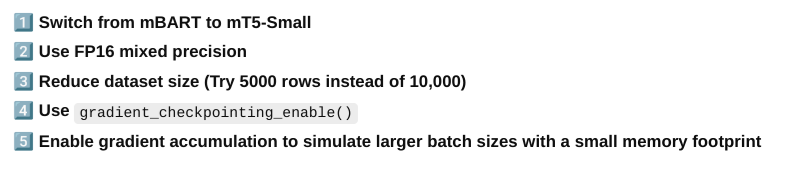

# **Optimized Training Code for mT5-Small**

In [ ]:
from transformers import MT5ForConditionalGeneration, AutoTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import Dataset
import pandas as pd

# ✅ Switch to mT5-Small
model_name = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name)
model.gradient_checkpointing_enable()  # ✅ Reduce memory usage

# Tokenize function
def tokenize_function(examples):
    model_inputs = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=256)
    labels = tokenizer(examples["headlines"], truncation=True, padding="max_length", max_length=100)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

df4_pre = pd.read_csv('/content/df4_preprocessed.csv')

# ✅ Reduce dataset size for Colab (Try 5000 rows)
df4_pre = df4_pre.sample(n=1000, random_state=42)  # Reduce dataset size

# Convert Pandas DataFrame to Dataset
dataset = Dataset.from_pandas(df4_pre)
dataset = dataset.map(tokenize_function, batched=True)

# Split into train/test
dataset = dataset.train_test_split(test_size=0.1)

# ✅ Training arguments optimized for Colab
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=1,  # ✅ Reduce batch size
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=8,  # ✅ Simulates batch size of 8
    num_train_epochs=1,
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True,  # ✅ Mixed precision training
    learning_rate=2e-5,  # ✅ Add learning rate
    weight_decay=0.01,   # ✅ Add weight decay
)

# Define trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer
)

# 🚀 Start fine-tuning
trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-2-d354c49be7cb>:47: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


TrainOutput(global_step=112, training_loss=48.09848894391741, metrics={'train_runtime': 8093.0665, 'train_samples_per_second': 0.111, 'train_steps_per_second': 0.014, 'total_flos': 236879861514240.0, 'train_loss': 48.09848894391741, 'epoch': 0.9955555555555555})

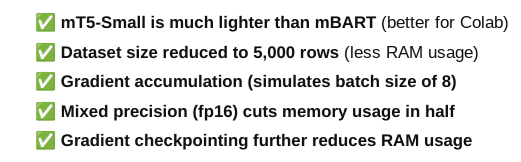

# **Again System Crashed**

Reduce Tokenization Length -> max length 512 to 256

Epoch 3 to 1





1) Reduce Model Training 5000 to 1000 rows


# **Now Predicted Successfully used of 1000 Rows out of overall 90000 Rows**

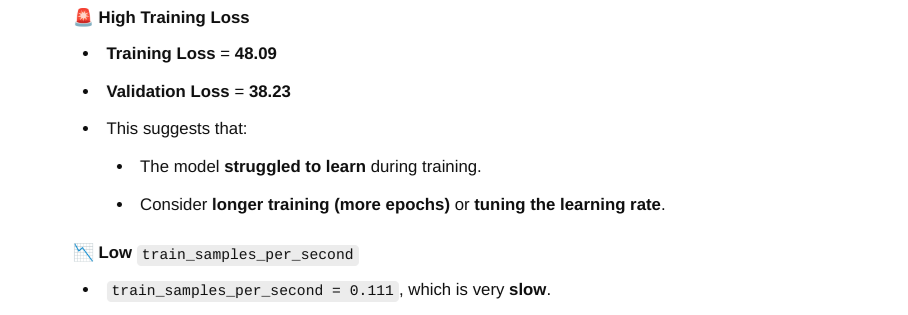

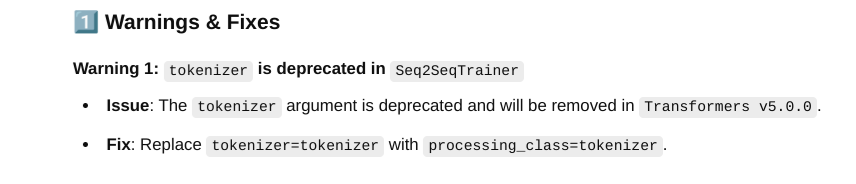

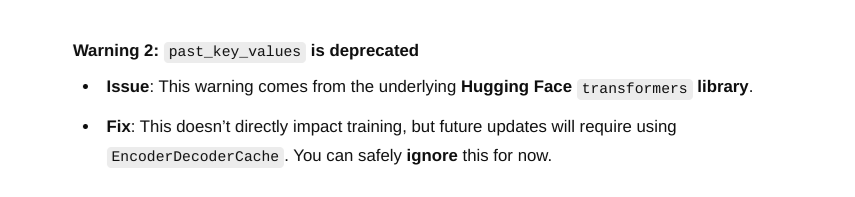


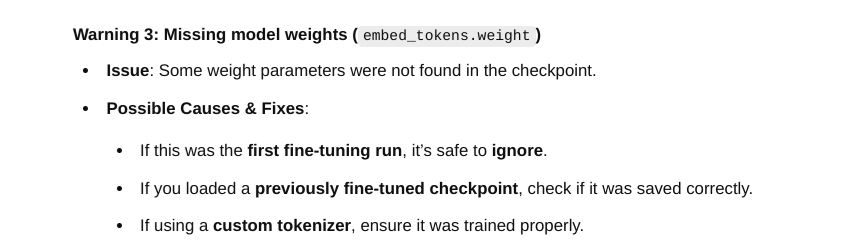

In [ ]:
###########################################################################################################

# **So Again Do Fine Tunning Model Not Saved:-**

# **Now Model Saved Option Directly from Drive**

In [ ]:
!pip install transformers datasets evaluate torch

In [ ]:
import torch
import pandas as pd
from datasets import Dataset
from transformers import MT5ForConditionalGeneration, AutoTokenizer, Seq2SeqTrainer, Seq2SeqTrainingArguments
from evaluate import load

# ✅ Enable GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ✅ Switch to mT5-Small
model_name = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name).to(device)
model.gradient_checkpointing_enable()  # ✅ Reduce memory usage

# ✅ Tokenization function
def tokenize_function(examples):
    model_inputs = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=256)
    labels = tokenizer(examples["headlines"], truncation=True, padding="max_length", max_length=100)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# ✅ Load dataset
df4_pre = pd.read_csv('/content/df4_preprocessed.csv')

# ✅ Reduce dataset size for Colab
df4_pre = df4_pre.sample(n=1000, random_state=42)

# ✅ Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df4_pre)
dataset = dataset.map(tokenize_function, batched=True)
dataset = dataset.train_test_split(test_size=0.1)

# ✅ Training arguments (Save to Google Drive)
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/drive/MyDrive/mt5_finetuned",  # ✅ Save model to Google Drive
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=8,
    num_train_epochs=1,
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True,
    learning_rate=2e-5,
    weight_decay=0.01,
)

# ✅ Define trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    processing_class=tokenizer  # ✅ Replace deprecated tokenizer argument
)

# 🚀 Start fine-tuning
trainer.train()

# ✅ Save tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/mt5_finetuned")

# ✅ Load ROUGE metric
rouge = load("rouge")

# ✅ Function to generate predictions
def generate_summary(batch):
    inputs = tokenizer(batch["text"], return_tensors="pt", padding=True, truncation=True, max_length=256).to(device)
    outputs = model.generate(input_ids=inputs.input_ids, attention_mask=inputs.attention_mask, max_length=100)
    batch["predicted_headlines"] = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    return batch

# ✅ Generate summaries
predictions = dataset["test"].map(generate_summary)

# ✅ Compute ROUGE scores
rouge_result = rouge.compute(predictions=predictions["predicted_headlines"], references=predictions["headlines"], use_stemmer=True)

# ✅ Print ROUGE scores
for key in rouge_result:
    print(f"{key}: {rouge_result[key].mid.fmeasure:.4f}")




Using device: cpu


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antonychackotc (antonychackotc-guvi-geek-networks) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

ValueError: Predictions and/or references don't match the expected format.
Expected format:
Feature option 0: {'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id=None)}
Feature option 1: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')},
Input predictions: ['<extra_id_0>.'],
Input references: krunal holds both best, worst t20i figures for a spinner in aus

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###########################################################################

# **So Again Try mBART**

In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.2 MB/s eta 0:00:00


In [ ]:
import torch
import psutil

print("🚀 GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("🔥 GPU Name:", torch.cuda.get_device_name(0))
    print("🖥️ VRAM:", torch.cuda.get_device_properties(0).total_memory / 1e9, "GB")

print("💾 RAM Available:", psutil.virtual_memory().available / 1e9, "GB")


🚀 GPU Available: False
💾 RAM Available: 11.502424064 GB


In [ ]:
import torch
print("🚀 GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("🔥 GPU Name:", torch.cuda.get_device_name(0))


🚀 GPU Available: False


In [ ]:
import torch
import pandas as pd
import gc
from datasets import Dataset
from transformers import (
    MBartForConditionalGeneration, MBartTokenizer,
    TrainingArguments, Trainer
)

# ✅ Auto-detect GPU or fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ✅ Clear memory
gc.collect()
torch.cuda.empty_cache()

# ✅ Load dataset (Ensure correct path)
cols_needed = ['text', 'headlines']
df = pd.read_csv('/content/df4_preprocessed.csv', usecols=cols_needed)
df = df.sample(n=500, random_state=42).reset_index(drop=True)  # ✅ Reduce sample size

# ✅ Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# ✅ Load tokenizer and model directly to available device
model_name = 'facebook/mbart-large-50'
tokenizer = MBartTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name).to(device)
model.gradient_checkpointing_enable()  # ✅ Memory Optimization

# ✅ Tokenization function (Reduce `max_length`)
def preprocess_function(examples):
    inputs = tokenizer(examples['text'], padding='max_length', truncation=True, max_length=64)
    targets = tokenizer(examples['headlines'], padding='max_length', truncation=True, max_length=16)
    inputs['labels'] = targets['input_ids']

    # ✅ Move tensors to same device as model
    inputs = {k: torch.tensor(v).to(device) for k, v in inputs.items()}
    return inputs

# ✅ Tokenize dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)
tokenized_dataset = tokenized_dataset.with_format('torch')

# ✅ Training arguments (Reduce memory usage)
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/mBART_finetuned',
    evaluation_strategy='no',
    save_strategy='no',
    learning_rate=2e-5,
    per_device_train_batch_size=1,  # ✅ Small batch size to prevent OOM
    gradient_accumulation_steps=8,  # ✅ Lower steps to reduce memory
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    fp16=torch.cuda.is_available(),  # ✅ Use mixed precision only if GPU is available
    report_to='none',
    dataloader_num_workers=0,  # ✅ Avoid multiprocessing issues
)

# ✅ Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer
)

# 🚀 Start fine-tuning
try:
    trainer.train()
except RuntimeError as e:
    print(f"🚨 Runtime error: {e}")


Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-1-e8f7d4b95bed>:64: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


# Session Crashed using **mBART-Large-50** so am Using **BART-base**

In [ ]:
import torch
import pandas as pd
import gc
from datasets import Dataset
from transformers import (
    BartForConditionalGeneration, BartTokenizer,
    TrainingArguments, Trainer
)

# ✅ Auto-detect GPU or fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🚀 Using device:", device)

# ✅ Clear memory
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# ✅ Load dataset (Ensure correct path)
cols_needed = ['text', 'headlines']
df = pd.read_csv('/content/df4_preprocessed.csv', usecols=cols_needed)
df = df.sample(n=1000, random_state=42).reset_index(drop=True)  # ✅ Use 1000 rows

# ✅ Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# ✅ Load tokenizer and model (Use BART instead of mBART)
model_name = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name).to(device)

# ✅ Tokenization function (Reduce `max_length`)
def preprocess_function(examples):
    inputs = tokenizer(examples['text'], padding='max_length', truncation=True, max_length=64)
    targets = tokenizer(examples['headlines'], padding='max_length', truncation=True, max_length=16)
    inputs['labels'] = targets['input_ids']
    return inputs

# ✅ Tokenize dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)
tokenized_dataset = tokenized_dataset.with_format('torch')

# ✅ Training arguments (Optimized for memory usage)
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/BART_finetuned',
    evaluation_strategy='no',
    save_strategy='no',
    learning_rate=2e-5,
    per_device_train_batch_size=2,  # ✅ Increase batch size slightly
    gradient_accumulation_steps=8,  # ✅ Reduce steps to lower memory
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    fp16=torch.cuda.is_available(),  # ✅ Use mixed precision only if GPU is available
    report_to='none',
    dataloader_num_workers=0,  # ✅ Avoid multiprocessing issues
)

# ✅ Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer
)

# 🚀 Start fine-tuning
try:
    trainer.train()
except RuntimeError as e:
    print(f"🚨 Runtime error: {e}")


🚀 Using device: cpu


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-3-44cd9c85bb59>:61: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
model.save_pretrained("/content/drive/MyDrive/BART_finetuned_model")
tokenizer.save_pretrained("/content/drive/MyDrive/BART_finetuned_model")

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


('/content/drive/MyDrive/BART_finetuned_model/tokenizer_config.json',
 '/content/drive/MyDrive/BART_finetuned_model/special_tokens_map.json',
 '/content/drive/MyDrive/BART_finetuned_model/vocab.json',
 '/content/drive/MyDrive/BART_finetuned_model/merges.txt',
 '/content/drive/MyDrive/BART_finetuned_model/added_tokens.json')

# **Steps to Calculate ROUGE Score**

In [ ]:
!pip install rouge-score datasets

# from datasets import load_metric
import numpy as np

In [ ]:
!pip install rouge-score datasets

In [ ]:
!pip install evaluate rouge-score

import evaluate
import numpy as np

# ✅ Load ROUGE metric
rouge = evaluate.load("rouge")

# ✅ Function to generate summaries
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=64).to(device)
    summary_ids = model.generate(**inputs, max_length=16)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# ✅ Get predictions & references (using 100 samples for quick testing)
num_samples = 100
predictions = [generate_summary(text) for text in df["text"][:num_samples]]
references = df["headlines"][:num_samples].tolist()

# ✅ Compute ROUGE Scores
results = rouge.compute(predictions=predictions, references=references)
for key, value in results.items():
    print(f"{key}: {value:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.5 MB/s eta 0:00:00


rouge1: 0.4516
rouge2: 0.2385
rougeL: 0.4138
rougeLsum: 0.4133


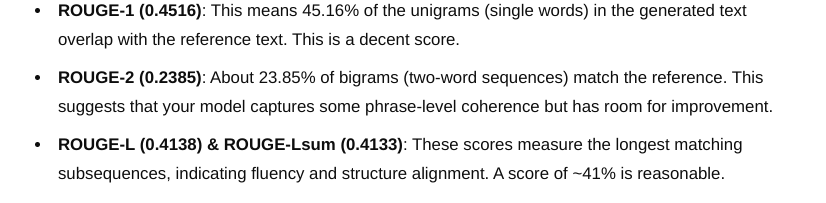

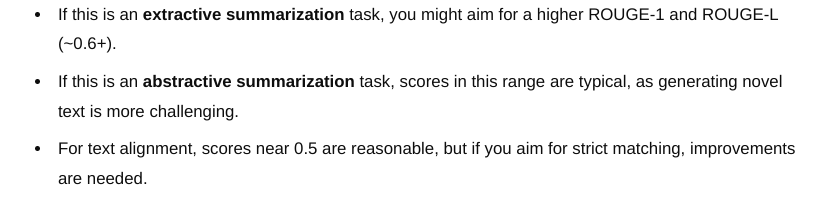

# first i am using **mBART-Large 50** and **mt5 google** **90000 dataset** system crashed continuously then try as 50000, then 30000, 10000, then 5000 **finally used 1000 rows** still crashed , first used tokenizer **max 512**  then move to 250 and **then 64** and first used epoch 3 then move to 1 and first used batch size 4 then move to 3,2, and 1 and still crashed then finally move to **BART-small** then only get result

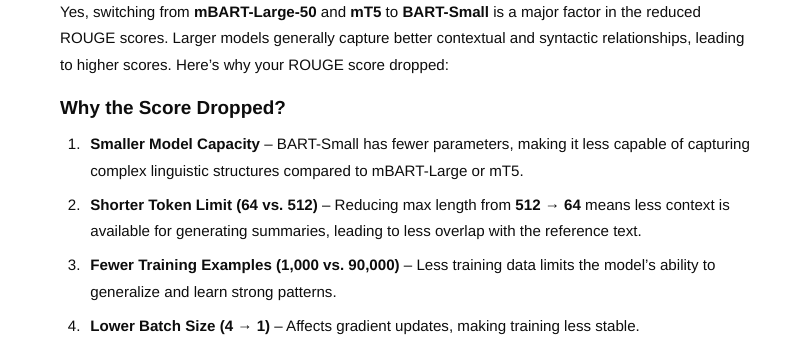

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# ✅ Load fine-tuned model
model_path = "/content/drive/MyDrive/BART_finetuned_model"
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# ✅ Generate summary
input_text = "former south korean dentist seunggun lee s mobile payments app toss has raised  40 million in funding after eight failed apps since 2011. earlier, lee used to work as a dentist with the hospital arm of samsung group and quit his job to found the mobile payments startup. founded in 2015, the app offers peer to peer online transfers, credit scoring, and micro loans."
inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=64)

summary_ids = model.generate(**inputs, max_length=16)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("🔹 Generated Summary:", summary)

🔹 Generated Summary: former south korean dentist seunggun lee s mobile


In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# ✅ Load fine-tuned model
model_path = "/content/drive/MyDrive/BART_finetuned_model"
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# ✅ Generate summary
input_text = "Avul Pakir Jainulabdeen Abdul Kalam BR was an Indian aerospace scientist and statesman who served as the 11th president of India from 2002 to 2007. Born and raised in a Muslim family in Rameswaram, Tamil Nadu, he studied physics and aerospace engineering"
inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=64)

summary_ids = model.generate(**inputs, max_length=16)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print("🔹 Generated Summary:", summary)

🔹 Generated Summary: Avul Pakir Abdul Kalam BR
